# Linear Regression Model

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import scipy.stats as stats
import seaborn as sns


In [22]:
# Load the data from the uploaded file
file_path = '/Users/nataliiabondarenko/Desktop/GitHub/project-4/Resources/merged_data.csv'
data = pd.read_csv(file_path)


In [23]:
# Define the initial set of predictors based on user input
initial_predictors = [
    'Average CO Value', 'Median CO Value', '90th Percentile CO Value',
    'Average NO2 Value', 'Median NO2 Value', '90th Percentile NO2 Value',
    'Average OZONE Value', 'Median OZONE Value', '90th Percentile OZONE Value',
    'Average PM2 Value', 'Median PM2 Value', '90th Percentile PM2 Value',
    'Average PM10 Value', 'Median PM10 Value', '90th Percentile PM10 Value'
]


In [24]:
# Create a new column for the total number of unhealthy days
data['Unhealthy Days Total'] = data['Unhealthy for Sensitive Groups Days'] + data['Unhealthy Days'] + data['Very Unhealthy Days']


In [25]:
# Check if 'AQI' column exists in the data
if 'AQI' not in data.columns:
    data['AQI'] = data['Max AQI']

# Add 'AQI' to the predictors list
initial_predictors.append('AQI')


In [26]:
# Selecting the initial predictors and the target variable
X = data[initial_predictors]
y = data['Unhealthy Days Total']


In [27]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Initialize and fit the Linear Regression model on the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
# Make predictions on the test data
y_pred = lr.predict(X_test)


In [30]:
# Calculate and display the performance metrics for the initial model
mse_initial = mean_squared_error(y_test, y_pred)
r2_initial = r2_score(y_test, y_pred)
print(f"Initial MSE: {mse_initial}, Initial R²: {r2_initial}")


Initial MSE: 233.214239332411, Initial R²: 0.7184462910065426


In [31]:
# Analyzing correlations to suggest additional predictors
correlation_matrix = data.corr()
additional_predictors = ['90th Percentile AQI', 'Days CO', 'Days NO2', 'Days PM10']
for predictor in additional_predictors:
    if predictor not in initial_predictors:
        print(f"Correlation between {predictor} and 'Unhealthy Days Total': {correlation_matrix['Unhealthy Days Total'][predictor]}")

Correlation between 90th Percentile AQI and 'Unhealthy Days Total': 0.983712448460282
Correlation between Days CO and 'Unhealthy Days Total': 0.6141520020284595
Correlation between Days NO2 and 'Unhealthy Days Total': 0.2058087702286309
Correlation between Days PM10 and 'Unhealthy Days Total': 0.34689672254023707


/var/folders/bw/19b5cf5j7f38vd208wvypvrc0000gn/T/ipykernel_12467/899660101.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [32]:
# Update the predictors list with the additional predictors
predictors = initial_predictors + additional_predictors


In [33]:
# Selecting the updated predictors and the target variable
X = data[predictors]
y = data['Unhealthy Days Total']


In [34]:
# Splitting the data into training and test sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Initialize and fit the Linear Regression model on the updated training data
lr.fit(X_train, y_train)


LinearRegression()

In [36]:
# Make predictions on the updated test data
y_pred = lr.predict(X_test)


In [37]:
# Calculate and display the performance metrics for the updated model
mse_updated = mean_squared_error(y_test, y_pred)
r2_updated = r2_score(y_test, y_pred)
print(f"Updated MSE: {mse_updated}, Updated R²: {r2_updated}")


Updated MSE: 32.14783644498627, Updated R²: 0.9611887223819999


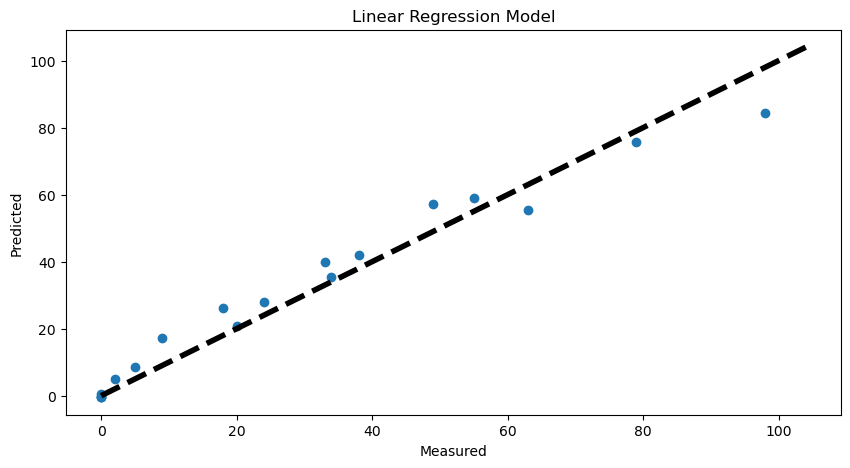

In [38]:
# Visualizing the relationship between actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Model')
plt.show()

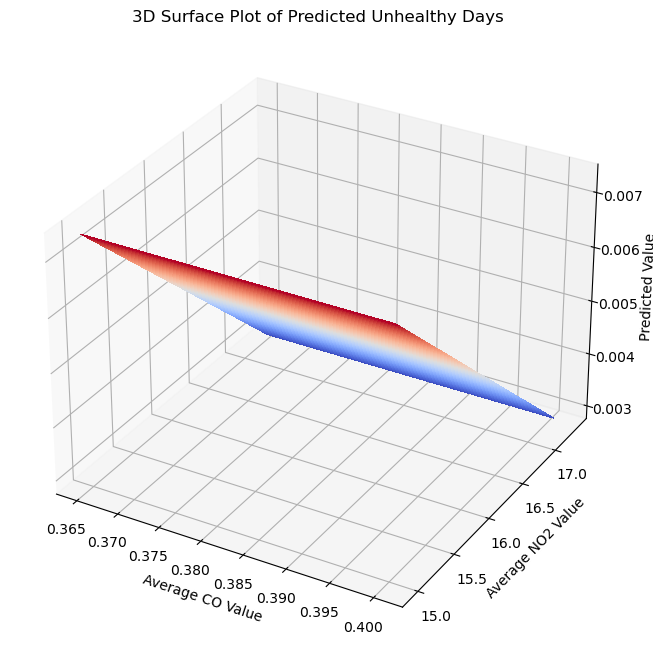

In [39]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import pandas as pd

# Selecting two significant predictors for the 3D plot
predictor1 = 'Average CO Value'
predictor2 = 'Average NO2 Value'

# Create a grid of values for the two predictors
x = np.linspace(data[predictor1].min(), data[predictor1].max(), 100)
y = np.linspace(data[predictor2].min(), data[predictor2].max(), 100)
x, y = np.meshgrid(x, y)

# Create a DataFrame with the same columns as used in the model training
model_input = pd.DataFrame(columns=predictors)

# Set the grid values for the two chosen predictors
model_input[predictor1] = x.ravel()
model_input[predictor2] = y.ravel()

# Fill other columns with their mean values
for col in model_input.columns:
    if col not in [predictor1, predictor2]:
        model_input[col] = data[col].mean()

# Predict using the linear regression model
z = lr.predict(model_input)

# Reshape z for plotting
z = z.reshape(x.shape)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='coolwarm', linewidth=0, antialiased=False)

# Labels and titles
ax.set_xlabel(predictor1)
ax.set_ylabel(predictor2)
ax.set_zlabel('Predicted Value')
ax.set_title('3D Surface Plot of Predicted Unhealthy Days')

# Show the plot
plt.show()
